In [2]:
!pip3 install torch

In [12]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.nn import Linear

In [ ]:
v = torch.tensor([1, 2, 3, 4, 5])
print(v)

tensor([1, 2, 3, 4, 5])


In [ ]:
print(v[1:-1])
print(v.dtype)
print(v.size())

tensor([2, 3, 4])
torch.int64
torch.Size([5])


In [ ]:
f = torch.FloatTensor([1, 2, 3])
print(f)
print(f.dtype)

tensor([1., 2., 3.])
torch.float32


In [ ]:
v.view(1, -1)

tensor([[1, 2, 3, 4, 5]])

In [ ]:
v.view(5, -1)

tensor([[1],
        [2],
        [3],
        [4],
        [5]])

In [ ]:
v.view(2, -1)

RuntimeError: ignored

In [ ]:
a = np.array([1, 2, 3, 4, 5])
print(a)

[1 2 3 4 5]


In [ ]:
tensor_conv = torch.from_numpy(a)
print(tensor_conv)
print(tensor_conv.type())

tensor([1, 2, 3, 4, 5])
torch.LongTensor


In [ ]:
numpy_conv = tensor_conv.numpy()
print(numpy_conv)

[1 2 3 4 5]


In [ ]:
one = torch.tensor([1, 2, 3])
two = torch.tensor([1, 2, 4])
dot_product = torch.dot(one, two)
print(dot_product)
one * two


tensor(17)


tensor([ 1,  4, 12])

In [ ]:
one.numpy() * two.numpy()

array([ 1,  4, 12])

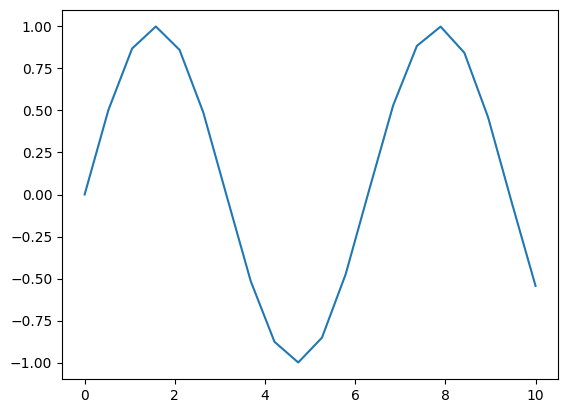

In [ ]:
x = torch.linspace(0, 10, 20)
y = torch.sin(x)
plt.plot(x.numpy(), y.numpy())

In [ ]:
three_dim = torch.arange(0, 36, 2).view(3, 3, 2)
print(three_dim)

tensor([[[ 0,  2],
         [ 4,  6],
         [ 8, 10]],

        [[12, 14],
         [16, 18],
         [20, 22]],

        [[24, 26],
         [28, 30],
         [32, 34]]])


In [ ]:
three_dim[1, :-1, :]

tensor([[12, 14],
        [16, 18]])

In [ ]:
matrix1 = torch.tensor([1, 2, 3, 4, 5, 6]).view(2, 3)
matrix2 = torch.tensor([1, 2, 3, 4, 5, 6]).view(3, 2)
torch.matmul(matrix1, matrix2)

tensor([[22, 28],
        [49, 64]])

In [ ]:
matrix1 @ matrix2

tensor([[22, 28],
        [49, 64]])

In [ ]:
x1 = torch.tensor(1.0, requires_grad=True)
z1 = torch.tensor(2.0, requires_grad=True)
y1 = x1**2 + z1**3
y1.backward()
x1.grad

tensor(2.)

In [ ]:
z1.grad

tensor(12.)

In [4]:
w = torch.tensor(3.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

In [5]:
def forward(x):
  y = w*x + b
  return y

In [11]:
x = torch.tensor([3, 7])
forward(x)

tensor([10., 22.], grad_fn=<AddBackward0>)

In [14]:
torch.manual_seed(2)
model = Linear(in_features=1, out_features=1)
print(model.bias, model.weight)

Parameter containing:
tensor([-0.2380], requires_grad=True) Parameter containing:
tensor([[0.2294]], requires_grad=True)


In [15]:
x = torch.tensor([[2.0], [7.3]])
print(model(x))

tensor([[0.2208],
        [1.4366]], grad_fn=<AddmmBackward0>)


In [4]:
import torch

# Initial values for w and b
w = torch.tensor(3.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

# Define the input data and ground truth (target)
x = torch.tensor([3, 7], dtype=torch.float32)
ground_truth = torch.tensor([10.5, 22.8], dtype=torch.float32)

# Optimization algorithm (SGD in this example)
optimizer = torch.optim.SGD([w, b], lr=0.01)  # lr is the learning rate

# Training loop
for epoch in range(100):  # You can adjust the number of epochs
    # Forward pass
    predictions = w * x + b

    # Compute the Mean Squared Error (MSE) loss
    loss = torch.mean((predictions - ground_truth)**2)

    # Backpropagation: Compute gradients
    loss.backward()

    # Update parameters using the optimizer
    optimizer.step()

    # Zero the gradients to prevent accumulation
    optimizer.zero_grad()

    if epoch % 10 == 0:
        print(f'Epoch [{epoch+1}/100], Loss: {loss.item():.4f}')

# After training, the optimized values of w and b will be available
print("Optimized w:", w.item())
print("Optimized b:", b.item())

Epoch [1/100], Loss: 0.4450
Epoch [11/100], Loss: 0.0085
Epoch [21/100], Loss: 0.0080
Epoch [31/100], Loss: 0.0076
Epoch [41/100], Loss: 0.0072
Epoch [51/100], Loss: 0.0068
Epoch [61/100], Loss: 0.0065
Epoch [71/100], Loss: 0.0061
Epoch [81/100], Loss: 0.0058
Epoch [91/100], Loss: 0.0055
Optimized w: 3.1086955070495605
Optimized b: 1.0804682970046997


In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    pred = self.linear(x)
    return pred

torch.manual_seed(1)
model = LR(1, 1)
print(model)

x = torch.tensor([[1.0], [2.0]])
print(model.forward(x))
print(model.parameters())
[w, b] = model.parameters()
print(w)
print(b)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward0>)
<generator object Module.parameters at 0x000002122CFDF348>
Parameter containing:
tensor([[0.5153]], requires_grad=True)
Parameter containing:
tensor([-0.4414], requires_grad=True)


In [3]:
X = torch.randn(20, 1)*10
y = X + 3*torch.randn(20, 1)
print(X)
print(y)

[w, b] = model.parameters()
def get_params():
  return (w[0][0].item(), b[0].item())
     


tensor([[ -6.5398],
        [-16.0948],
        [ -1.0017],
        [ -6.0919],
        [ -6.6291],
        [  8.0731],
        [  4.3914],
        [ 11.7120],
        [ 17.6743],
        [ -0.9536],
        [  1.3937],
        [-15.7850],
        [ -7.9807],
        [ -1.3162],
        [ -7.9844],
        [  3.3573],
        [  2.7533],
        [ 17.1630],
        [ -0.5614],
        [  9.1070]])
tensor([[ -6.0809],
        [-17.5219],
        [ -6.6481],
        [ -8.4215],
        [-12.0392],
        [  4.1481],
        [  5.7512],
        [ 15.1385],
        [ 18.4201],
        [ -6.2798],
        [  1.3172],
        [-18.8550],
        [ -7.6510],
        [ -3.2552],
        [ -6.6988],
        [  7.7855],
        [ -2.6073],
        [ 21.9940],
        [ -2.6733],
        [  8.5512]])


In [ ]:
plt.plot(X.numpy(), y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('x')

In [ ]:
def plot_fit(title):
  plt.title = title
  w1, b1 = get_params()
  x1 = np.array([-30, 30])
  y1 = w1*x1 + b1
  plt.plot(x1, y1, 'r')
  plt.scatter(X, y)
  plt.show()
     
plot_fit('Initial Model')